# Matplotlib Box Plots Exercise - Skill Pay Analysis

**df.plot(kind = 'box')**

## Statistical Analysis - Investigate High Paying Skills

In [2]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Filter for Data Analyst Data
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

In [3]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [4]:
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [5]:
# Clean up the job_skills column by exploding it out

df_DA_US.explode('job_skills')

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,python,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,r,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,alteryx,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,tableau,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,excel,"{'analyst_tools': ['excel', 'powerpoint']}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,sql,"{'analyst_tools': ['tableau', 'excel', 'altery..."
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,vba,"{'analyst_tools': ['tableau', 'excel', 'altery..."
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,tableau,"{'analyst_tools': ['tableau', 'excel', 'altery..."
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,excel,"{'analyst_tools': ['tableau', 'excel', 'altery..."


In [7]:
# Save it to the original Data Frame
df_DA_US = df_DA_US.explode('job_skills')
df_DA_US['job_skills']

109        python
109             r
109       alteryx
109       tableau
180         excel
           ...   
784882        sql
784882        vba
784882    tableau
784882      excel
784882    alteryx
Name: job_skills, Length: 17440, dtype: object

In [8]:
# Now we need to get two new Data Frames aggregated based on the salary_year_avg and job_skills
df_DA_US[['salary_year_avg', 'job_skills']]

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel
...,...,...
784882,87500.0,sql
784882,87500.0,vba
784882,87500.0,tableau
784882,87500.0,excel


In [10]:
# We need the count and the median of each skill, for this we're going to use groupby and the aggregation method to pass a list with the count and the median
df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

In [16]:
# Now we need 2 Data Frames: (1) for the top 10 highest salaries; (2) for the top 10 skills - that have the highest count with their associated salary

# (1) for the top 10 highest salaries
df_DA_top_pay = df_DA_US_group.sort_values(by='median', ascending=False).head(10)
df_DA_top_skills = df_DA_US_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

<Axes: ylabel='job_skills'>

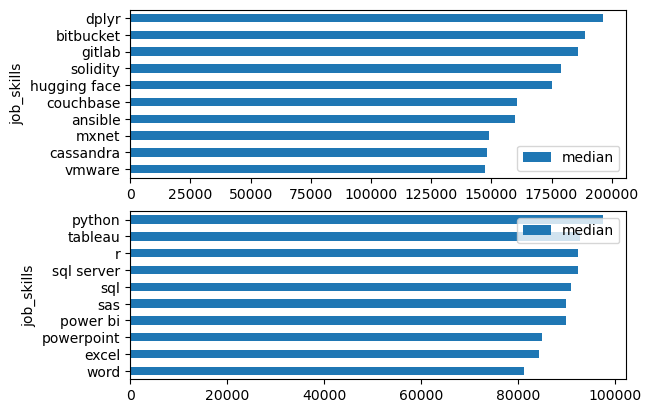

In [21]:
# Now let's plot this bad boy! 
# Since we're going to plot 2 graphs, we're going to use that subplot function ;)

fig, ax = plt.subplots(2,1) 

# Plotting the top pay df
df_DA_top_pay.plot(kind='barh', y='median', ax=ax[0])
ax[0].invert_yaxis() # this is to show the values in the graph from highest to lowest, another way to do this is to replace this line and the line above with:
# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0]), like we did below :)
df_DA_top_skills[::-1].plot(kind='barh', y='median', ax=ax[1]) #top in demand skills
# ax[1].invert_yaxis()

(0.0, 206062.5)

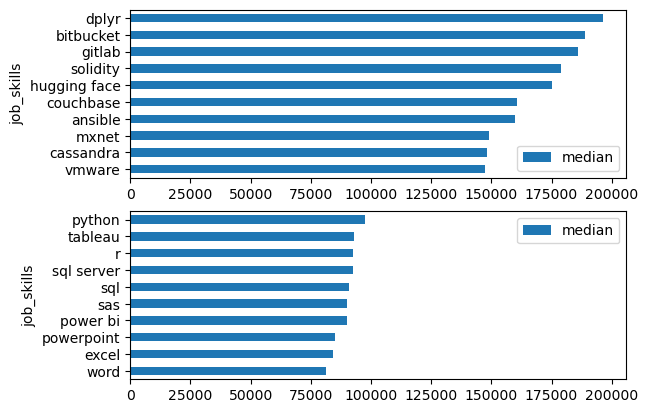

In [22]:
# Note that these graphs are not in the same x-axis. For us to compare them properly, we need to put them in the same x-axis. 
# So we're going to change the x-axis of the 2nd graph to 200000, using xlim

fig, ax = plt.subplots(2,1) 

df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0])
df_DA_top_skills[::-1].plot(kind='barh', y='median', ax=ax[1]) #top in demand skills
ax[1].set_xlim(ax[0].get_xlim())

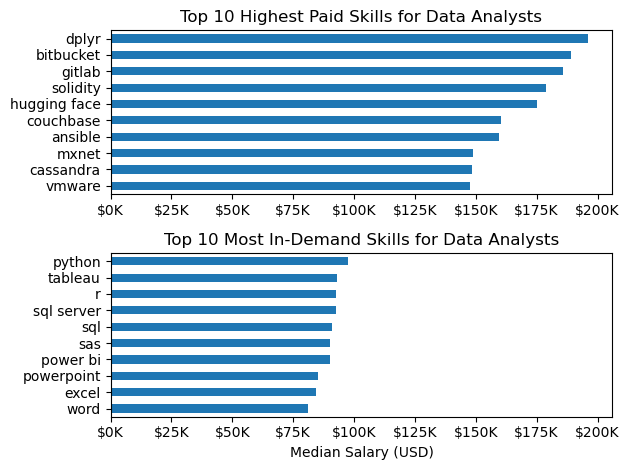

In [30]:
# Now let's do some clean-up by adding title and labels
fig, ax = plt.subplots(2,1) 

df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

df_DA_top_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)           #top in demand skills
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_ylabel('')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
fig.tight_layout()